In [18]:
import pandas as pd   #create data frame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests


In [19]:
df = pd.read_csv("data_sales.csv")
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


In [20]:
print(df.head())

        Retailer  Retailer ID Invoice Date     Region      State         City  \
0        Walmart      1128299    6/17/2021  Southeast    Florida      Orlando   
1      West Gear      1128299    7/16/2021      South  Louisiana  New Orleans   
2  Sports Direct      1197831    8/25/2021      South    Alabama   Birmingham   
3  Sports Direct      1197831    8/27/2021      South    Alabama   Birmingham   
4  Sports Direct      1197831    8/21/2021      South    Alabama   Birmingham   

                   Product Price per Unit Units Sold Total Sales  \
0          Women's Apparel       $103.00         218       2,245   
1          Women's Apparel       $103.00         163       1,679   
2    Men's Street Footwear        $10.00         700       7,000   
3  Women's Street Footwear        $15.00         575       8,625   
4  Women's Street Footwear        $15.00         475       7,125   

  Operating Profit Sales Method  
0          $1,257        Online  
1            $806        Online  
2 

In [21]:
# No. of culomns & rows
print(df.shape)


(9641, 12)


In [22]:
# Type of culomns
print(df.dtypes)

Retailer            object
Retailer ID          int64
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Sales Method        object
dtype: object


In [23]:
# Missing values
print(df.isna().sum())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64


In [25]:
# First: make sure that columns are clean and numeric
df["Price per Unit"] = (
    df["Price per Unit"]
    .astype(str)                               # temperory transfare it to string
    .str.replace(r"[\$,]", "", regex=True)     # remove any noisy values $ or ,
    .str.strip()                               # remove spaces 
)
df["Price per Unit"] = pd.to_numeric(df["Price per Unit"], errors="coerce")
# Second: fill the missing values by average
df["Price per Unit"] = df["Price per Unit"].fillna(df["Price per Unit"].mean())

In [26]:
for col in ["Total Sales", "Price per Unit", "Operating Profit"]:
    df[col] = df[col].replace(r"[\$,]", "", regex=True).astype(float)

In [27]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors="coerce")


In [28]:
# Direct assignments
df["Price per Unit"] = df["Price per Unit"].fillna(df["Price per Unit"].mean())



In [29]:
# clean and transfer any misiing values in cash columns 
for col in ["Total Sales", "Price per Unit", "Operating Profit"]:
    df[col] = (df[col].astype(str).str.replace(r"[\$,]", "", regex=True))
    df[col] = pd.to_numeric(df[col], errors="coerce")

# transfers Units Sold to Numeric
df["Units Sold"] = pd.to_numeric(df["Units Sold"], errors="coerce")

# fill missing values withoutt inplace in Series
df["Price per Unit"] = df["Price per Unit"].fillna(df["Price per Unit"].mean())
df["Units Sold"]     = df["Units Sold"].fillna(df["Units Sold"].median())

In [30]:
df["Profit Margin"] = df["Operating Profit"] / df["Total Sales"]

In [43]:
# Highst salers
top10_sales = (
    df.groupby("Product")["Total Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print("Top 10 Products by Sales:\n", top10_sales, "\n")

Top 10 Products by Sales:
 Product
Men's Street Footwear        20882669.0
Women's Apparel              17847910.0
Men's Athletic Footwear      15322410.0
Women's Street Footwear      12770688.0
Men's Apparel                12283155.0
Women's Athletic Footwear    10659235.0
Men's aparel                    54000.0
Name: Total Sales, dtype: float64 



In [44]:
# أthe products that have highest profit 
top10_profit = (
    df.groupby("Product")["Operating Profit"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print("Top 10 Products by Operating Profit:\n", top10_profit, "\n")

Top 10 Products by Operating Profit:
 Product
Men's Street Footwear        8280294.0
Women's Apparel              6856750.0
Men's Athletic Footwear      5168997.0
Women's Street Footwear      4499284.0
Men's Apparel                4440519.0
Women's Athletic Footwear    3896040.0
Men's aparel                   16200.0
Name: Operating Profit, dtype: float64 



In [45]:
#seprating based on regions
sales_by_region = df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False)
print("Sales by Region:\n", sales_by_region, "\n")


Sales by Region:
 Region
West         26902628.0
Northeast    18632487.0
Southeast    16317146.0
South        14407736.0
Midwest      13560070.0
Name: Total Sales, dtype: float64 



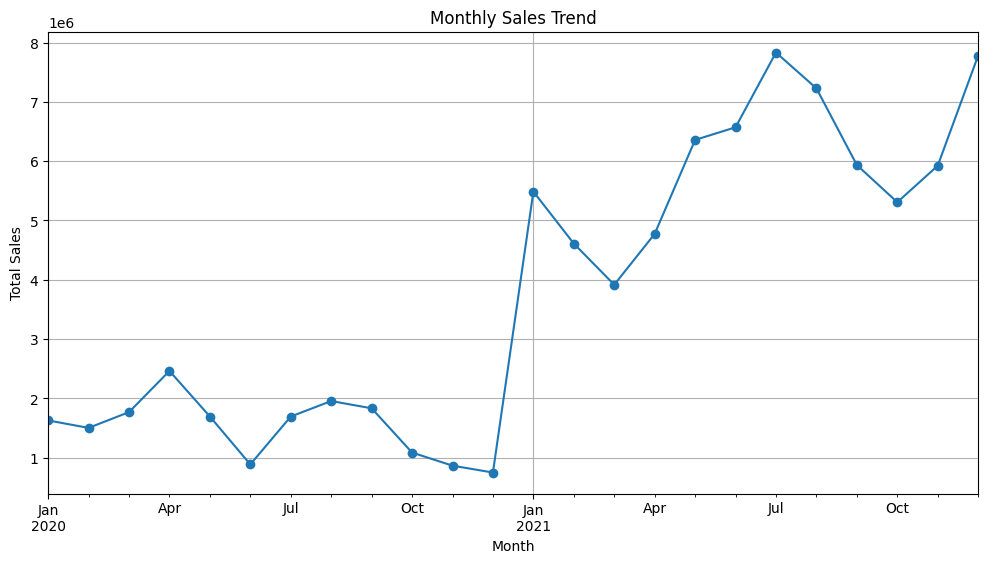

In [46]:
# the direction of products thruogh the months 
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors="coerce")
monthly_sales = df.groupby(df["Invoice Date"].dt.to_period("M"))["Total Sales"].sum()

monthly_sales.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [47]:
# highest state and cities 
top_state = df.groupby("State")["Total Sales"].sum().sort_values(ascending=False).head(1)
print("Top State:\n", top_state, "\n")

top10_cities = df.groupby("City")["Total Sales"].sum().sort_values(ascending=False).head(10)
print("Top 10 Cities:\n", top10_cities, "\n")


Top State:
 State
New York    6422918.0
Name: Total Sales, dtype: float64 

Top 10 Cities:
 City
Charleston       3997485.0
New York         3980134.0
San Francisco    3362174.0
Miami            3160090.0
Portland         3054564.0
Orlando          2768290.0
Seattle          2633075.0
Los Angeles      2563500.0
Houston          2487067.0
Albany           2442784.0
Name: Total Sales, dtype: float64 



Sales Share by Method (%):
 Sales Method
In-store    39.71
Online      27.57
Outlet      32.72
Name: Total Sales, dtype: float64 



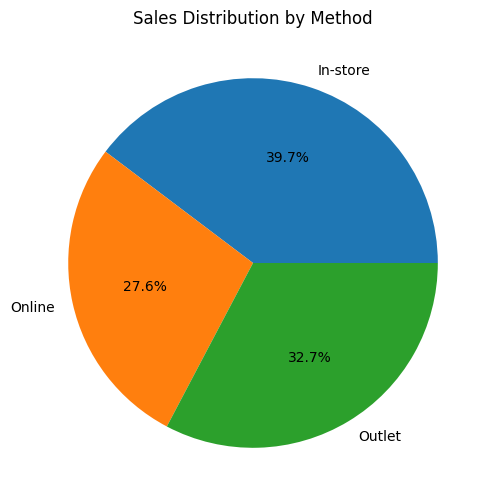

In [48]:
# precent of Distribution by Method
sales_method = df.groupby("Sales Method")["Total Sales"].sum()
share = (sales_method / sales_method.sum() * 100).round(2)
print("Sales Share by Method (%):\n", share, "\n")

share.plot(kind="pie", autopct='%1.1f%%', figsize=(6,6), ylabel="")
plt.title("Sales Distribution by Method")
plt.show()

In [49]:
# the relation between price and the number of units sold
#علاقة السعر بعدد الوحدات
corr = df["Price per Unit"].corr(df["Units Sold"])
print("Correlation Price vs Units Sold:", corr)

Correlation Price vs Units Sold: 0.2594207186731898


In [50]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Profit Margin       0
dtype: int64

In [39]:
df[df["Total Sales"] == 0][["Product", "Total Sales", "Operating Profit", "Profit Margin"]]

,Product,Total Sales,Operating Profit,Profit Margin
6529,Women's Athletic Footwear,0.0,0.0,NaN
6530,Women's Athletic Footwear,0.0,0.0,NaN
6531,Women's Athletic Footwear,0.0,0.0,NaN
6532,Women's Athletic Footwear,0.0,0.0,NaN


In [40]:
df["Profit Margin"].fillna(0, inplace=True)

/var/folders/c9/w3_8b3ms207f60lsbks2863w0000gn/T/ipykernel_72803/190200537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Profit Margin"].fillna(0, inplace=True)


In [2]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Profit Margin       0
dtype: int64